In [1]:
import os

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import tensorflow as tf

from utils import neural_network as nn
from utils import definitions as defs
from utils import visualization as viz

In [3]:
entire_ds = nn.dataset_from_csv(defs.ENTIRE_DATA_PATH)
train_ds = nn.dataset_from_csv(defs.TRAIN_DATA_PATH)
val_ds = nn.dataset_from_csv(defs.VAL_DATA_PATH)
test_ds = nn.dataset_from_csv(defs.TEST_DATA_PATH)

In [4]:
NUM_EPOCHS = 100
K = 10

def get_history(layer_width):
    model = nn.create_model(layer_width, entire_ds)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(train_ds, epochs=NUM_EPOCHS, verbose=0, validation_data=val_ds)
    return history

def experiment(layer_width):
    train_accuracy_histories = []
    val_accuracy_histories = []
    train_loss_histories = []
    val_loss_histories = []
    for i in range(K):
        history = get_history(layer_width)
        train_accuracy_histories.append(history.history['accuracy'])
        val_accuracy_histories.append(history.history['val_accuracy'])
        train_loss_histories.append(history.history['loss'])
        val_loss_histories.append(history.history['val_loss'])
    # список с кортежами, содержащими точности запусков для одного и того же количества эпох    
    train_accuracy_history_points = list(zip(*train_accuracy_histories))
    val_accuracy_history_points = list(zip(*val_accuracy_histories))
    train_loss_history_points = list(zip(*train_loss_histories))
    val_loss_history_points = list(zip(*val_loss_histories))

    train_accuracies_mean = np.array([np.mean(i) for i in train_accuracy_history_points])
    val_accuracies_mean = np.array([np.mean(i) for i in val_accuracy_history_points])
    train_loss_mean = np.array([np.mean(i) for i in train_loss_history_points])
    val_loss_mean = np.array([np.mean(i) for i in val_loss_history_points])
    
    train_accuracies_std = np.array([np.std(i) for i in train_accuracy_history_points])
    val_accuracies_std = np.array([np.std(i) for i in val_accuracy_history_points])
    train_loss_std = np.array([np.std(i) for i in train_loss_history_points])
    val_loss_std = np.array([np.std(i) for i in val_loss_history_points])
    
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].set_title('mean accuracy')
    axes[0].set_xlabel('эпохи')
    axes[0].set_ylabel('accuracy')
    axes[0].plot(range(1, NUM_EPOCHS+1), train_accuracies_mean, label='train')
    axes[0].plot(range(1, NUM_EPOCHS+1), val_accuracies_mean, label='val')
    axes[0].legend()
    
    axes[1].set_title('mean loss')
    axes[1].set_xlabel('эпохи')
    axes[1].set_ylabel('loss')
    axes[1].plot(range(1, NUM_EPOCHS+1), train_loss_mean, label='train')
    axes[1].plot(range(1, NUM_EPOCHS+1), val_loss_mean, label='val')
    axes[1].legend()
    
    plt.show()

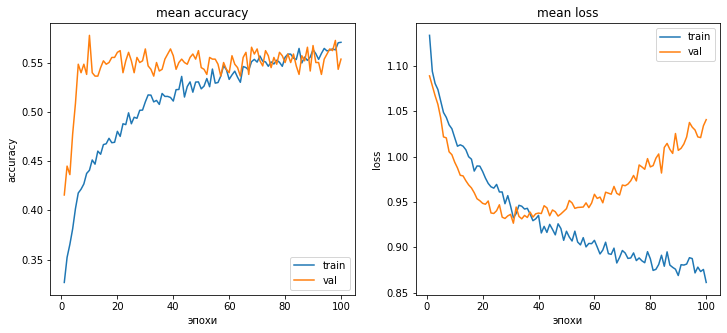

In [5]:
experiment(4)

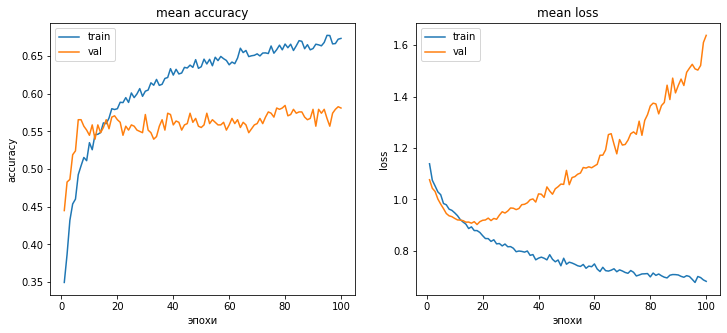

In [6]:
experiment(8)

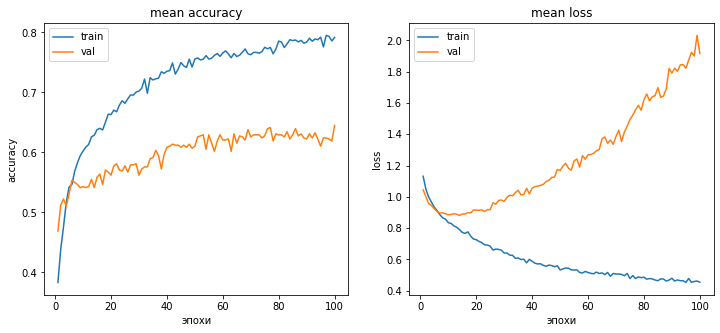

In [7]:
experiment(16)

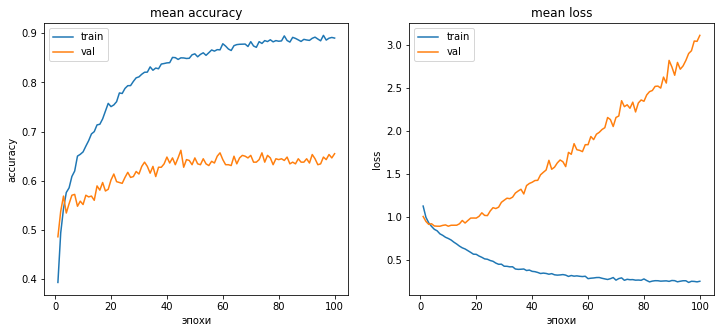

In [8]:
experiment(32)

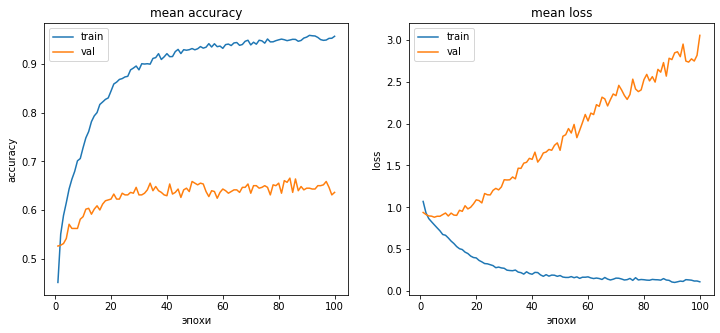

In [9]:
experiment(64)

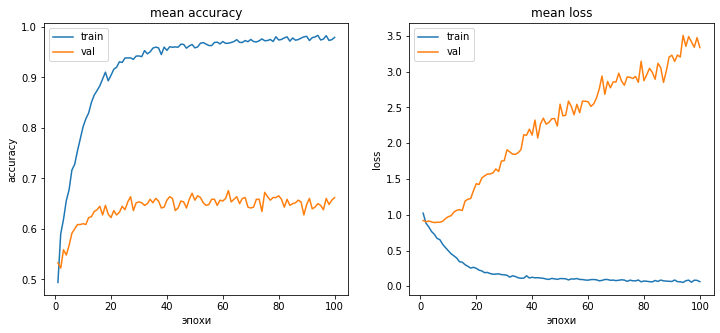

In [10]:
experiment(128)

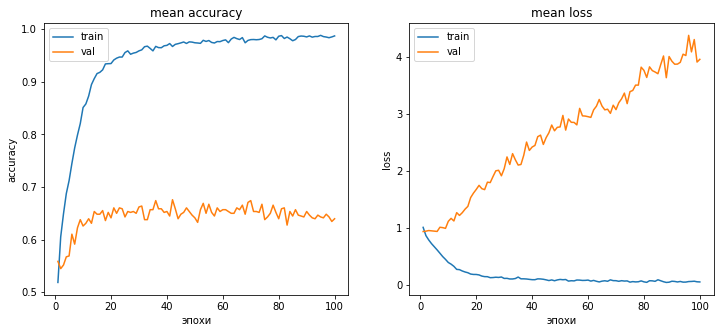

In [11]:
experiment(256)